In [1]:
import matplotlib.pyplot as plt 
import plots 
plots.mpltoolkit.load_mpl_presets 
import numpy as np 
import vice 
import sys 
sys.path.append("../") 
import src 
from src.plots.plots.utils import dummy_background_axes 
from src.simulations.yields import linear_agb_yield 

/Users/astrobeard/.local/lib/python3.7/site-packages/vice-1.3.0-py3.7-macosx-10.9-x86_64.egg/vice/__init__.py:136: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)
../src/plots/env.py:42: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams["text.latex.preamble"] = [r"\usepackage{amsmath}"]


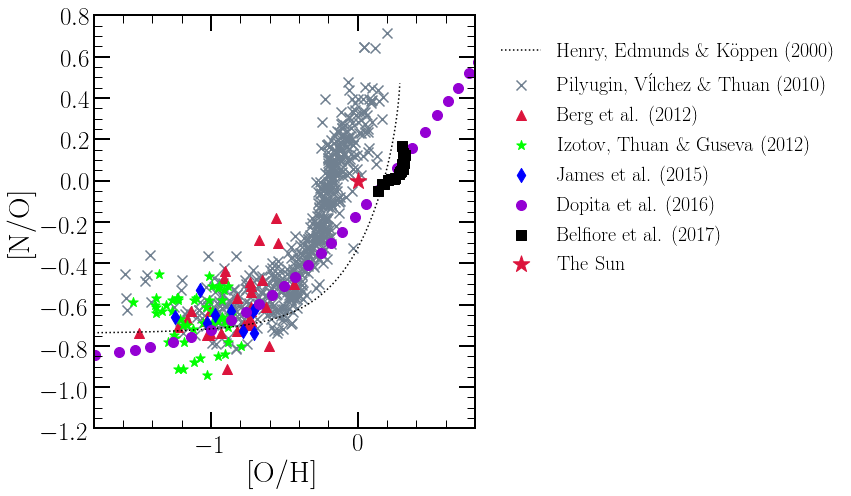

In [2]:
### figure setup ### 
fig = plt.figure(figsize = (12, 7), facecolor = "white") 
ax = fig.add_subplot(111) 
ax.set_xlabel("[O/H]") 
ax.set_ylabel("[N/O]") 
ax.set_xlim([-1.8, 0.8]) 
ax.set_ylim([-1.2, 0.8])
ax.set_yticks([-1.2 + 0.2 * _ for _ in range(11)])   

### Pilyugin, Vilchez & Thuan (2010) ### 
pilyugin2010 = src.data.read("pilyugin2010") 
kwargs = {
    "c": plots.mpltoolkit.named_colors()["slategray"], 
    "marker": plots.mpltoolkit.markers()["x"], 
    "label": r"Pilyugin, V$\acute{\text{i}}$lchez \& Thuan (2010)", 
    "s": 100 
}
ax.scatter(pilyugin2010["[o/h]"], pilyugin2010["[n/o]"], **kwargs) 

### Berg et al. (2012) ### 
berg2012 = src.data.read("berg2012") 
kwargs["c"] = plots.mpltoolkit.named_colors()["crimson"] 
kwargs["marker"] = plots.mpltoolkit.markers()["triangle_up"] 
kwargs["label"] = "Berg et al. (2012)" 
ax.scatter(berg2012["[o/h]"], berg2012["[n/o]"], **kwargs) 

### Izotov, Thuan & Guseva (2012) ### 
izotov2012 = src.data.read("izotov2012") 
kwargs["c"] = plots.mpltoolkit.named_colors()["lime"] 
kwargs["marker"] = plots.mpltoolkit.markers()["star"] 
kwargs["label"] = "Izotov, Thuan \& Guseva (2012)" 
ax.scatter(izotov2012["[o/h]"], izotov2012["[n/o]"], **kwargs) 

### James et al. (2015) ### 
james2015 = src.data.read("james2015") 
kwargs["c"] = plots.mpltoolkit.named_colors()["blue"] 
kwargs["marker"] = plots.mpltoolkit.markers()["thin_diamond"] 
kwargs["label"] = "James et al. (2015)" 
ax.scatter(james2015["[o/h]"], james2015["[n/o]"], **kwargs) 

### Dopita et al. (2016) ### 
dopita2016 = src.data.read("dopita2016") 
kwargs["c"] = plots.mpltoolkit.named_colors()["darkviolet"] 
kwargs["marker"] = plots.mpltoolkit.markers()["circle"] 
kwargs["label"] = "Dopita et al. (2016)" 
ax.scatter(dopita2016["[o/h]"], dopita2016["[n/o]"], **kwargs) 

### Belfiore et al. (2017) ### 
belfiore2017 = src.data.read("belfiore2017") 
kwargs["c"] = plots.mpltoolkit.named_colors()["black"] 
kwargs["marker"] = plots.mpltoolkit.markers()["square"] 
kwargs["label"] = "Belfiore et al. (2017)" 
ax.scatter(belfiore2017["[o/h]"], belfiore2017["[n/o]"], **kwargs) 

### Henry, Edmunds & Koeppen (2000) 
henry2000 = src.no_oh_relation.Henry2000() 
xvals = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 1000) 
yvals = [henry2000(_) for _ in xvals] 
ax.plot(xvals, yvals, c = plots.mpltoolkit.named_colors()["black"], 
    linestyle = ':', label = r"Henry, Edmunds \& K$\ddot{\text{o}}$ppen (2000)") 

### the sun ### 
ax.scatter([0], [0], c = plots.mpltoolkit.named_colors()["crimson"], 
    marker = plots.mpltoolkit.markers()["star"], s = 300, zorder = 100, 
    label = "The Sun")

### Legend ### 
kwargs = {
    "loc": plots.mpltoolkit.mpl_loc("upper left"), 
    "ncol": 1, 
    "frameon": False, 
    "fontsize": 20, 
    "bbox_to_anchor": (1.02, 0.98) 
} 
ax.legend(**kwargs) 
plt.tight_layout() 
plt.savefig("../paper/no_oh_observed.pdf") 

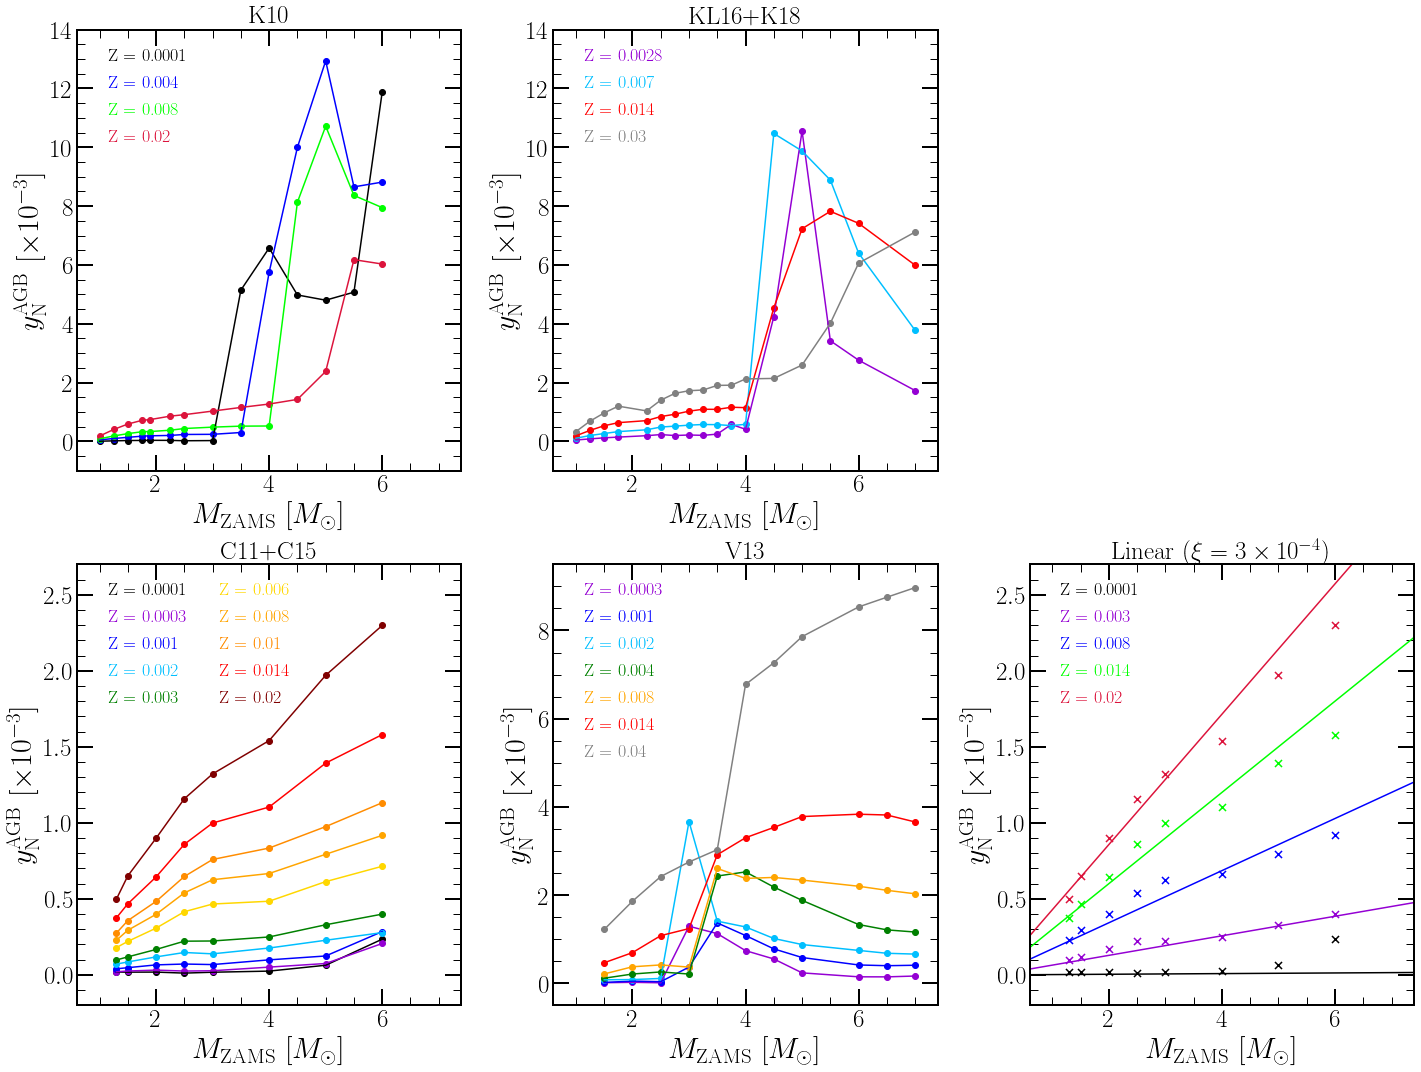

In [25]:
logprefactor = 3 # overall factor of 10^(-logprefactor) 

### figure setup ### 
fig = plt.figure(figsize = (20, 15), facecolor = "white") 
axes = [] 
# ylim = [[-0.2, 2.7], [-1, 14], None, [-0.5, 9.5], [-1, 14], [-0.2, 2.7]] 
ylim = [[-1, 14], [-1, 14], None, [-0.2, 2.7], [-0.5, 9.5], [-0.2, 2.7]] 
# labels = ["Cristallo et al. (2011, 2015)", "Karakas (2010)", None, "Ventura et al. (2013)", 
#     "Karakas \& Lugaro (2016)", r"Linear ($\xi$ = 0.02)"] 
# labels = ["Karakas (2010)", "Karakas \& Lugaro (2016)", None, "Cristallo et al. (2011, 2015)", 
#           "Ventura et al. (2013)", r"Linear ($\xi = 3\times10^{-4}$)"] 
labels = ["K10", "KL16+K18", None, "C11+C15", "V13", r"Linear ($\xi = 3\times10^{-4}$)"] 
for i in range(6): 
    if i == 2: continue 
    axes.append(fig.add_subplot(231 + i)) 
#     if i == 3: 
    axes[i - int(i > 2)].set_xlabel(r"$M_\text{ZAMS}$ [$M_\odot$]") 
    axes[i - int(i > 2)].set_ylabel(r"$y_\text{N}^\text{AGB}$ [$\times10^{-3}$]") 
#     else: 
#         plt.setp(axes[i].get_xticklabels(), visible = False) 
    axes[i - int(i > 2)].set_xlim([0.6, 7.4]) 
    axes[i - int(i > 2)].set_ylim(ylim[i]) 
#     axes[i].yaxis.set_label_position("right") 
#     axes[i].set_title(labels[i], rotation = 270, labelpad = 30) 
    axes[i - int(i > 2)].set_title(labels[i], fontsize = 25)
# dummy = dummy_background_axes([axes]) 
# dummy.set_ylabel(r"$y_\text{N}^\text{AGB}$ [$\times10^{-3}$]", labelpad = 40) 

### colors to plot each study's table in - each of the same length as the metallicities ### 
# colors = {
#     "cristallo11": ["black", "darkviolet", "blue", "deepskyblue", 
#                     "green", "gold", "orange", "darkorange", "red", "maroon"], 
#     "karakas10": ["black", "green", "orange", "maroon"], 
#     "ventura13": ["darkviolet", "blue", "deepskyblue", "green", "orange", "red", "grey"], 
#     "karakas16": ["green", "orange", "red", "grey"] 
# } 
colors = {
    "cristallo11": ["black", "darkviolet", "blue", "deepskyblue", 
                    "green", "gold", "orange", "darkorange", "red", "maroon"], 
    "karakas10": ["black", "blue", "lime", "crimson"], 
    "ventura13": ["darkviolet", "blue", "deepskyblue", "green", "orange", "red", "grey"], 
    "karakas16": ["darkviolet", "deepskyblue", "red", "grey"] 
} 
# studies = ["cristallo11", "karakas10", None, "ventura13", "karakas16"] 
studies = ["karakas10", "karakas16", None, "cristallo11", "ventura13"] 
for i in range(5): ### for each published table 
    legend_kwargs = {
        "loc": plots.mpltoolkit.mpl_loc("upper left"), 
        "frameon": False, 
        "handlelength": 0, 
        "fontsize": 18 
    }
    if i == 2: continue 
    y, m, z = vice.yields.agb.grid('n', study = studies[i]) 
    for j in range(len(z)): ### for each metallicity they report yields at 
        # plot points connected by lines 
        yields = [10**logprefactor * _[j] for _ in y] 
        kwargs = {"c": plots.mpltoolkit.named_colors()[colors[studies[i]][j]]} 
        axes[i - int(i > 2)].scatter(m, yields, **kwargs) 
        kwargs["label"] = "Z = %g" % (z[j]) 
        axes[i - int(i > 2)].plot(m, yields, **kwargs) 
        if i == 3: 
            legend_kwargs["ncol"] = 2 
            legend_kwargs["columnspacing"] = 1.0 
        else: 
            legend_kwargs["ncol"] = 1 
    leg = axes[i - int(i > 2)].legend(**legend_kwargs) 
    for j in range(len(z)): 
        leg.get_texts()[j].set_color(colors[studies[i]][j]) 
        leg.legendHandles[j].set_visible(False) 
        
### The linear model, with a few reference points from Cristallo et al. (2011, 2015) 
Z = [0.0001, 0.003, 0.008, 0.014, 0.02] 
# colors = ["black", "green", "orange", "red", "maroon"] 
colors = ["black", "darkviolet", "blue", "lime", "crimson"] 
model = linear_agb_yield(slope = 3.0e-4) 
y, m, z = vice.yields.agb.grid('n', study = "cristallo11") 
for i in range(len(Z)): 
    masses = np.linspace(axes[-1].get_xlim()[0], axes[-1].get_xlim()[1], 1000) 
    yields = [10**logprefactor * model(mass, Z[i]) for mass in masses] 
    kwargs = {"c": plots.mpltoolkit.named_colors()[colors[i]]} 
    idx = z.index(Z[i]) 
    yields_ = [10**logprefactor * _[idx] for _ in y] 
    axes[-1].scatter(m, yields_, marker = plots.mpltoolkit.markers()["x"], s = 50, **kwargs) 
    kwargs["label"] = "Z = %g" % (Z[i]) 
    axes[-1].plot(masses, yields, **kwargs) 
legend_kwargs["ncol"] = 1
leg = axes[-1].legend(**legend_kwargs) 
for i in range(len(Z)): 
    leg.get_texts()[i].set_color(colors[i]) 
    leg.legendHandles[i].set_visible(False) 


plt.tight_layout() 
# plt.subplots_adjust(hspace = 0) 
plt.savefig("../paper/agb_yield_models.pdf") 

/Users/astrobeard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: ScienceWarning: Supernovae yields from the Nomoto, Kobayashi & Tominaga (2013), ARA&A, 51, 457 study are sampled on a grid of stellar masses up to 40 Msun at this metallicity. Employing an upper mass limit larger than this may introduce numerical artifacts. Got: 100 Msun
/Users/astrobeard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: ScienceWarning: Supernovae yields from the Nomoto, Kobayashi & Tominaga (2013), ARA&A, 51, 457 study are sampled on a grid of stellar masses up to 40 Msun at this metallicity. Employing an upper mass limit larger than this may introduce numerical artifacts. Got: 100 Msun
/Users/astrobeard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: ScienceWarning: Supernovae yields from the Woosley & Weaver (1995) ApJ, 101, 181 study are sampled on a grid of stellar masses up to 40 Msun at this metallicity. Employing an upper mass limit larger than this m

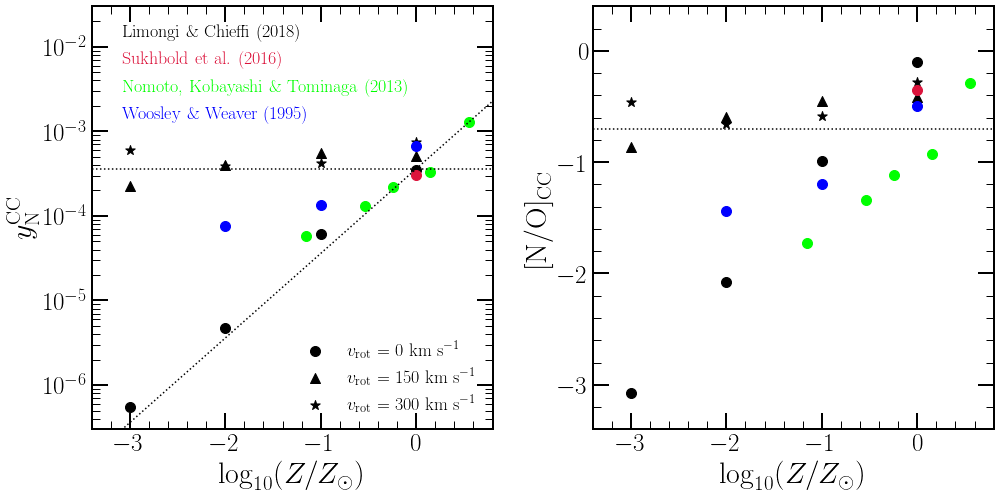

In [3]:
fig = plt.figure(figsize = (14, 7), facecolor = "white") 
ax1 = fig.add_subplot(121) 
ax2 = fig.add_subplot(122) 
ax1.set_xlabel(r"$\log_{10} (Z / Z_\odot)$") 
ax2.set_xlabel(r"$\log_{10} (Z / Z_\odot)$") 
ax1.set_ylabel(r"$y_\text{N}^\text{CC}$") 
# ax2.set_ylabel(r"$\log_{10}\text{(N/O)}_\text{CC}$") 
ax2.set_ylabel(r"[N/O]$_\text{CC}$") 
ax1.set_yscale("log") 
ax1.set_xlim([-3.4, 0.8]) 
ax2.set_xlim([-3.4, 0.8]) 
ax1.set_ylim([3.e-7, 3.e-2]) 
ax2.set_ylim([-3.4, 0.4]) 
ax2.set_yticks([-3, -2, -1, 0]) 
studies = ["LC18", "S16/W18", "NKT13", "WW95"] 
names = {
    "LC18": "Limongi \& Chieffi (2018)", 
    "NKT13": "Nomoto, Kobayashi \& Tominaga (2013)", 
    "S16/W18": "Sukhbold et al. (2016)", 
    "WW95": "Woosley \& Weaver (1995)" 
}
metallicities = {
    "LC18": [-3, -2, -1, 0], 
    "NKT13": [-1.15, -0.54, -0.24, 0.15, 0.55], 
    "S16/W18": [0], 
    "WW95": [-4, -2, -1, 0] 
} 
rotation = {
    "LC18": [0, 150, 300], 
    "NKT13": [0], 
    "S16/W18": [0], 
    "WW95": [0] 
}
markers = {
    0: "circle", 
    150: "triangle_up", 
    300: "star" 
}
colors = {
    "LC18": "black", 
    "NKT13": "lime", 
    "S16/W18": "crimson", 
    "WW95": "blue" 
}

for i in studies: 
    for j in metallicities[i]: 
        for k in rotation[i]: 
            kwargs = {
                "c": plots.mpltoolkit.named_colors()[colors[i]], 
                "marker": plots.mpltoolkit.markers()[markers[k]], 
                "s": 100 
            }
            y_n_cc, _ = vice.yields.ccsne.fractional('n', study = i, MoverH = j, rotation = k) 
            y_o_cc, _ = vice.yields.ccsne.fractional('o', study = i, MoverH = j, rotation = k) 
#             cc_ratio = np.log10(y_n_cc / y_o_cc) - np.log10(14.007 / 15.999) 
            cc_ratio = np.log10(y_n_cc / y_o_cc) - np.log10(vice.solar_z['n'] / vice.solar_z['o']) 
            ax1.scatter(j, y_n_cc, **kwargs)
            ax2.scatter(j, cc_ratio, **kwargs) 
ax2.plot(ax2.get_xlim(), 2 * [-0.7], c = plots.mpltoolkit.named_colors()["black"], 
    linestyle = ':') 
            
lines = len(studies) * [None] 
for i in range(len(lines)): 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[studies[i]]], 
        "label": names[studies[i]] 
    }
    lines[i] = ax1.plot([0, 0], [1, 1], **kwargs)[0] 
leg = ax1.legend(loc = plots.mpltoolkit.mpl_loc("upper left"), fontsize = 18, ncol = 1, 
    frameon = False, handlelength = 0) 
ax1.add_artist(leg) 
for i in range(len(lines)): 
    leg.get_texts()[i].set_color(colors[studies[i]]) 
    leg.legendHandles[i].set_visible(False) 
    lines[i].remove() 
points = len(rotation["LC18"]) * [None] 
for i in range(len(points)): 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()["black"], 
        "marker": plots.mpltoolkit.markers()[markers[rotation["LC18"][i]]], 
        "label": r"$v_\text{rot}$ = %g km s$^{-1}$" % (rotation["LC18"][i]), 
        "s": 100 
    } 
    points[i] = ax1.scatter([0, 0], [1, 1], **kwargs) 
ax1.legend(loc = plots.mpltoolkit.mpl_loc("lower right"), fontsize = 18, ncol = 1, 
    frameon = False) 
for i in range(len(points)): 
    points[i].remove() 
    
# def broken(z): 
#     y = 3.6e-4 
#     if z >= 0.007: y += 2.e-4 * ((z - 0.007) / 0.014)
#     return y 
# yvals = [broken(0.014 * 10**_) for _ in xvals] 
# ax1.plot(xvals, yvals, c = plots.mpltoolkit.named_colors()["black"], linestyle = ':') 

def notbroken(z): 
    return 3.6e-4 * (z / 0.014) 
kwargs = {
    "c": plots.mpltoolkit.named_colors()["black"], 
    "linestyle": ':' 
}
xvals = np.linspace(-3.4, 0.8, 1000) 
yvals = [notbroken(0.014 * 10**_) for _ in xvals] 
ax1.plot(xvals, yvals, **kwargs)
ax1.plot(xvals, len(xvals) * [3.6e-4], **kwargs) 

plt.tight_layout() 
plt.subplots_adjust(wspace = 0.25)
plt.savefig("../paper/n_cc_yields.pdf") 

In [12]:
def schaefer2020trend(nbins = 20, logmstar = [10.5, 11]): 
    raw = src.data.read("schaefer2020").filter(
        "logmstar", ">=", logmstar[0]).filter(
        "logmstar", "<=", logmstar[1]) 
    bins = np.linspace(min(raw["[o/h]"]), max(raw["[o/h]"]), nbins + 1) 
    oh = nbins * [0.] 
    no = nbins * [0.] 
    std_oh = nbins * [0.] 
    std_no = nbins * [0.] 
    for i in range(nbins): 
        sub = raw.filter("[o/h]", ">=", bins[i]).filter("[o/h]", "<=", bins[i + 1]) 
        oh[i] = np.mean(sub["[o/h]"]) 
        std_oh[i] = np.std(sub["[o/h]"]) 
        no[i] = np.mean(sub["[n/o]"]) 
        std_no[i] = np.std(sub["[n/o]"]) 
    return [oh, no, std_oh, std_no] 

In [13]:
oh, no, std_oh, std_no = schaefer2020trend() 
print(oh) 
print(no) 
print(std_oh) 
print(std_no) 

[-0.5771635587518991, -0.5155260531832527, -0.4547284684307433, -0.3954744832885737, -0.33489824097320486, -0.2754410992573305, -0.21626730567258465, -0.15536008425912892, -0.09613323118929981, -0.035993282423412924, 0.023909421060486907, 0.08297137934293992, 0.14288713101574432, 0.20218929223760046, 0.2615832687312569, 0.32046346731182024, 0.3791347953578122, 0.4355365058408443, 0.4883673815847763, 0.5470629895271413]
[-0.29637154999611637, -0.2872990854484572, -0.2916859162452674, -0.2961752868020322, -0.2728036907747286, -0.2595716409571392, -0.253398657217856, -0.2396902829524765, -0.23402482906985494, -0.20209582481681324, -0.171020465566852, -0.13409976003768936, -0.09635446379380419, -0.060259691544131404, -0.02497191211451756, 0.009182054632888605, 0.041339906624461104, 0.07472517131012363, 0.11520056757003135, 0.1765602320703936]
[0.0169905834911324, 0.012981710757413674, 0.016515830862034047, 0.017494863448631874, 0.016406047573127337, 0.01753636495880205, 0.01686065634978047

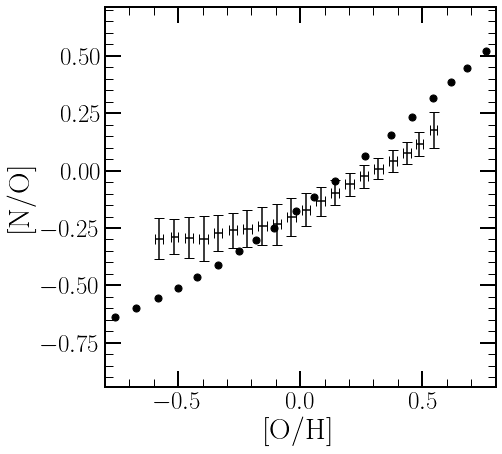

In [20]:
fig = plt.figure(figsize = (7, 7), facecolor = "white") 
ax = fig.add_subplot(111) 
ax.set_xlabel("[O/H]") 
ax.set_ylabel("[N/O]") 
ax.set_xlim([-0.8, 0.8])
oh, no, std_oh, std_no = schaefer2020trend(logmstar = [10.5, 11]) 
kwargs = {
#     "marker": plots.mpltoolkit.markers()["point"], 
    "c": plots.mpltoolkit.named_colors()["black"], 
    "xerr": std_oh, 
    "yerr": std_no, 
    "fmt": "none", 
} 
ax.errorbar(oh, no, **kwargs) 

dopita2016 = src.data.read("dopita2016") 
kwargs = {
    "c": plots.mpltoolkit.named_colors()["black"], 
    "marker": plots.mpltoolkit.markers()["circle"], 
    "label": "Dopita et al. (2016)", 
    "s": 50 
} 
ax.scatter(dopita2016["[o/h]"], dopita2016["[n/o]"], **kwargs) 

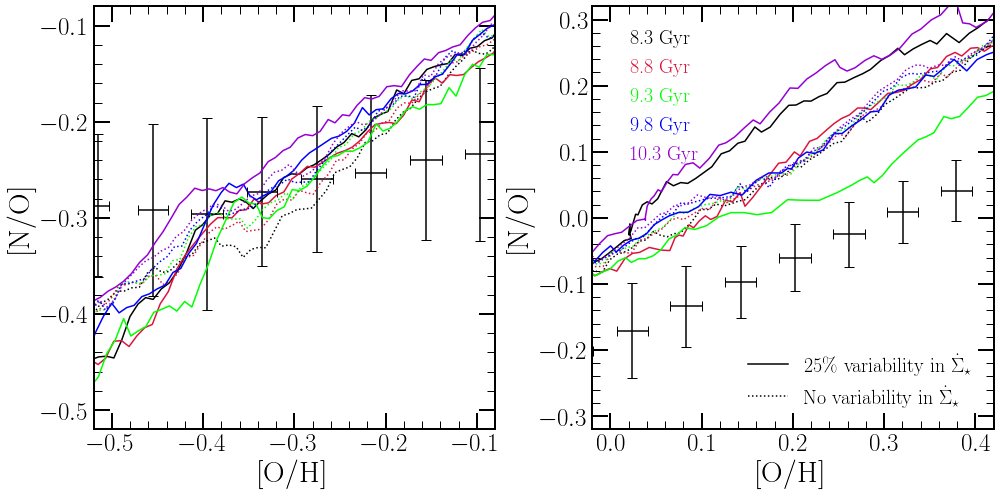

In [17]:
fig = plt.figure(figsize = (14, 7), facecolor = "white") 
ax1 = fig.add_subplot(121) 
ax2 = fig.add_subplot(122) 
# ax = fig.add_subplot(111) 
# dummy = dummy_background_axes([[ax1, ax2]]) 
# dummy.set_xlabel("[O/H]", labelpad = 30) 
# dummy.set_ylabel("[N/O]", labelpad = 60) 
for ax in [ax1, ax2]: 
    ax.set_xlabel("[O/H]") 
    ax.set_ylabel("[N/O]") 
# ax1.set_xlim([-1.1, 0.7]) 
# ax1.set_ylim([-0.7, 0.35]) 
ax1.set_xlim([-0.52, -0.08]) 
ax1.set_ylim([-0.52, -0.08])
ax2.set_xlim([-0.02, 0.42]) 
# ax2.set_ylim([-0.12, 0.32]) 
ax2.set_ylim([-0.32, 0.32]) 

legend_kwargs = {
    "loc": plots.mpltoolkit.mpl_loc("lower right"), 
    "ncol": 1, 
    "frameon": False, 
    "fontsize": 20, 
    "bbox_to_anchor": (0.99, 0.01), 
}
line1 = ax2.plot([1, 2], [1, 2], c = plots.mpltoolkit.named_colors()["black"], 
    label = r"25\% variability in $\dot{\Sigma}_\star$")[0]
line2 = ax2.plot([1, 2], [1, 2], c = plots.mpltoolkit.named_colors()["black"], 
    label = r"No variability in $\dot{\Sigma}_\star$", linestyle = ':')[0] 
leg = ax2.legend(**legend_kwargs) 
ax2.add_artist(leg) 
line1.remove() 
line2.remove() 

insideout = vice.output("../outputs/diffusion/insideout") 
modulated = vice.output("../outputs/diffusion/modulated") 
# times = [6., 6.5, 7., 7.5, 8.] 
# times = [8., 8.5, 9., 9.5, 10.0] 
times = [8.3, 8.8, 9.3, 9.8, 10.3] 
colors = ["black", "crimson", "lime", "blue", "darkviolet"] 
zones = ["zone%d" % (_) for _ in range(20, 155)] 
for ax in [ax1, ax2]: 
    for i in range(len(times)): 
        diff = [abs(_ - times[i]) for _ in insideout.zones["zone0"].history["time"]] 
        idx = diff.index(min(diff)) 
        kwargs = {"c": plots.mpltoolkit.named_colors()[colors[i]]} 
        xvals = [insideout.zones[zone].history["[o/h]"][idx] for zone in zones] 
        yvals = [insideout.zones[zone].history["[n/o]"][idx] for zone in zones] 
        ax.plot(xvals, yvals, linestyle = ':', **kwargs) 
        kwargs["label"] = "%g Gyr" % (times[i]) 
        xvals = [modulated.zones[zone].history["[o/h]"][idx] for zone in zones] 
        yvals = [modulated.zones[zone].history["[n/o]"][idx] for zone in zones] 
        ax.plot(xvals, yvals, **kwargs) 
legend_kwargs["handlelength"] = 0 
legend_kwargs["loc"] = plots.mpltoolkit.mpl_loc("upper left") 
legend_kwargs["bbox_to_anchor"] = (0.01, 0.99) 
leg = ax2.legend(**legend_kwargs) 
for i in range(len(colors)): 
    leg.get_texts()[i].set_color(colors[i]) 
    leg.legendHandles[i].set_visible(False) 
    
oh, no, std_oh, std_no = schaefer2020trend() 
kwargs = {
#     "marker": plots.mpltoolkit.markers()["point"], 
    "c": plots.mpltoolkit.named_colors()["black"], 
    "xerr": std_oh, 
    "yerr": std_no, 
    "fmt": "none", 
} 
ax1.errorbar(oh, no, **kwargs) 
ax2.errorbar(oh, no, **kwargs) 

plt.tight_layout() 
plt.savefig("../paper/no_oh_modsfr.pdf") 

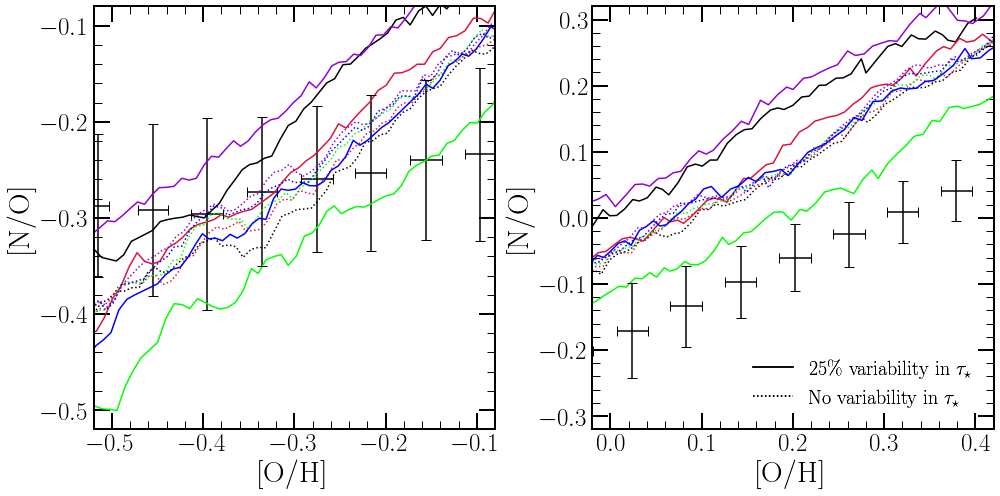

In [21]:
fig = plt.figure(figsize = (14, 7), facecolor = "white") 
ax1 = fig.add_subplot(121) 
ax2 = fig.add_subplot(122) 
for ax in [ax1, ax2]: 
    ax.set_xlabel("[O/H]") 
    ax.set_ylabel("[N/O]") 
ax1.set_xlim([-0.52, -0.08]) 
ax1.set_ylim([-0.52, -0.08])
ax2.set_xlim([-0.02, 0.42]) 
# ax2.set_ylim([-0.12, 0.32]) 
ax2.set_ylim([-0.32, 0.32]) 

legend_kwargs = {
    "loc": plots.mpltoolkit.mpl_loc("lower right"), 
    "ncol": 1, 
    "frameon": False, 
    "fontsize": 20, 
    "bbox_to_anchor": (0.99, 0.01), 
}
line1 = ax2.plot([1, 2], [1, 2], c = plots.mpltoolkit.named_colors()["black"], 
    label = r"25\% variability in $\tau_\star$")[0]
line2 = ax2.plot([1, 2], [1, 2], c = plots.mpltoolkit.named_colors()["black"], 
    label = r"No variability in $\tau_\star$", linestyle = ':')[0] 
leg = ax2.legend(**legend_kwargs) 
ax2.add_artist(leg) 
line1.remove() 
line2.remove() 

insideout = vice.output("../outputs/diffusion/insideout") 
modulated = vice.output("../outputs/diffusion/modulated_sfe") 
# times = [6., 6.5, 7., 7.5, 8.] 
# times = [8., 8.5, 9., 9.5, 10.0] 
times = [8.3, 8.8, 9.3, 9.8, 10.3] 
colors = ["black", "crimson", "lime", "blue", "darkviolet"] 
zones = ["zone%d" % (_) for _ in range(20, 155)] 
for ax in [ax1, ax2]: 
    for i in range(len(times)): 
        diff = [abs(_ - times[i]) for _ in insideout.zones["zone0"].history["time"]] 
        idx = diff.index(min(diff)) 
        kwargs = {"c": plots.mpltoolkit.named_colors()[colors[i]]} 
        xvals = [insideout.zones[zone].history["[o/h]"][idx] for zone in zones] 
        yvals = [insideout.zones[zone].history["[n/o]"][idx] for zone in zones] 
        ax.plot(xvals, yvals, linestyle = ':', **kwargs) 
        kwargs["label"] = "%g Gyr" % (times[i]) 
        xvals = [modulated.zones[zone].history["[o/h]"][idx] for zone in zones] 
        yvals = [modulated.zones[zone].history["[n/o]"][idx] for zone in zones] 
        ax.plot(xvals, yvals, **kwargs) 
# legend_kwargs["handlelength"] = 0 
# legend_kwargs["loc"] = plots.mpltoolkit.mpl_loc("upper left") 
# legend_kwargs["bbox_to_anchor"] = (0.01, 0.99) 
# leg = ax2.legend(**legend_kwargs) 
# for i in range(len(colors)): 
#     leg.get_texts()[i].set_color(colors[i]) 
#     leg.legendHandles[i].set_visible(False) 

oh, no, std_oh, std_no = schaefer2020trend() 
kwargs = {
#     "marker": plots.mpltoolkit.markers()["point"], 
    "c": plots.mpltoolkit.named_colors()["black"], 
    "xerr": std_oh, 
    "yerr": std_no, 
    "fmt": "none", 
} 
ax1.errorbar(oh, no, **kwargs) 
ax2.errorbar(oh, no, **kwargs) 

plt.tight_layout() 
plt.savefig("../paper/no_oh_modsfe.pdf") 

In [43]:
def percentiles(values): 
    hist, bins = np.histogram(values, bins = 1000, range = [-1, 1], density = True) 
    hist = hist.tolist() 
    bins = bins.tolist() 
    s = 0 
    sixteenth = None 
    fiftieth = None 
    eightyfourth = None 
    for i in range(len(hist)): 
        s += hist[i] * (bins[i + 1] - bins[i]) 
        if s >= 0.16 and sixteenth is None: sixteenth = (bins[i + 1] + bins[i]) / 2 
        if s >= 0.5 and fiftieth is None: fiftieth = (bins[i + 1] + bins[i]) / 2 
        if s >= 0.84 and eightyfourth is None: eightyfourth = (bins[i + 1] + bins[i]) / 2 
    if s == 0: 
        return [0., 0., 0.] 
    else: 
        return [sixteenth, fiftieth, eightyfourth] 

oh_bins = [-1 + 0.01 * i for i in range(201)] 
schaefer2020 = src.data.read("schaefer2020").filter("logmstar", ">=", 10.5).filter("logmstar", "<=", 11.0) 
SCHAEFER2020_OH = (len(oh_bins) - 1) * [0.] 
SCHAEFER2020_NO = (len(oh_bins) - 1) * [0.] 
SCHAEFER2020_NO_16TH = (len(oh_bins) - 1) * [0.] 
SCHAEFER2020_NO_84TH = (len(oh_bins) - 1) * [0.] 
for i in range(len(oh_bins) - 1): 
    sub = schaefer2020.filter("[o/h]", ">=", oh_bins[i]).filter("[o/h]", "<=", oh_bins[i + 1]) 
    SCHAEFER2020_OH[i] = np.median(sub["[o/h]"]) 
    SCHAEFER2020_NO_16TH[i], SCHAEFER2020_NO[i], SCHAEFER2020_NO_84TH[i] = percentiles(sub["[n/o]"]) 
    sys.stdout.write("\r%d" % (i)) 
    sys.stdout.flush() 
sys.stdout.write("\n") 

199


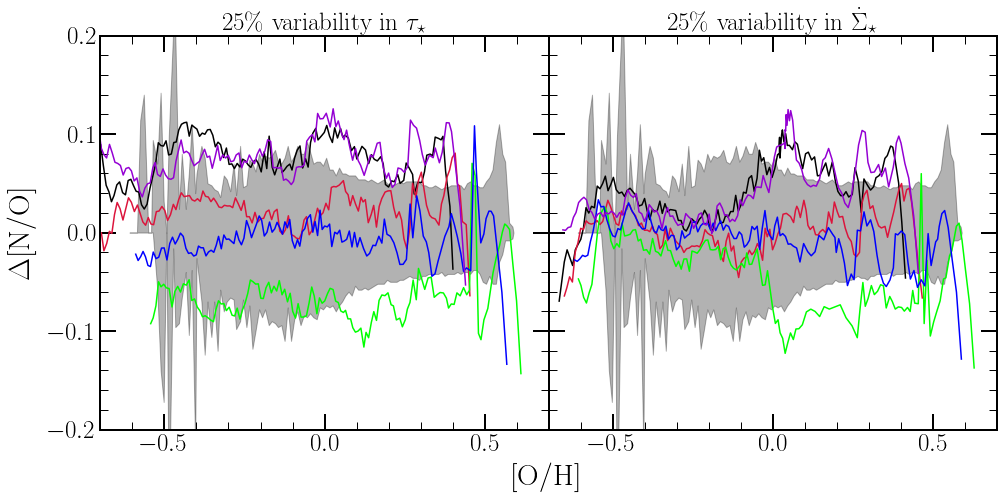

In [58]:
fig = plt.figure(figsize = (14, 7), facecolor = "white") 
ax1 = fig.add_subplot(121) 
ax2 = fig.add_subplot(122, sharey = ax1) 
for ax in [ax1, ax2]: 
    ax.set_xlim([-0.7, 0.7]) 
    ax.set_ylim([-0.2, 0.2]) 
    ax.set_xticks([-0.5, 0.0, 0.5]) 
    ax.set_yticks([-0.2, -0.1, 0.0, 0.1, 0.2]) 
plt.setp(ax2.get_yticklabels(), visible = False) 
dummy = dummy_background_axes([[ax1, ax2]]) 
dummy.set_xlabel("[O/H]", labelpad = 30) 
dummy.set_ylabel(r"$\Delta$[N/O]", labelpad = 60) 
ax1.set_title(r"25\% variability in $\tau_\star$", fontsize = 25) 
ax2.set_title(r"25\% variability in $\dot{\Sigma}_\star$", fontsize = 25) 

min_zone = 20
times = [8.3, 8.8, 9.3, 9.8, 10.3] 
colors = ["black", "crimson", "lime", "blue", "darkviolet"] 
zones = ["zone%d" % (_) for _ in range(min_zone, 155)] 
all_zones = ["zone%d" % (_) for _ in range(155)] 

fiducial = vice.output("../outputs/diffusion/insideout") 
modsfr = vice.output("../outputs/diffusion/modulated") 
modsfe = vice.output("../outputs/diffusion/modulated_sfe") 

for i in range(len(times)): 
    modsfr_delta = len(zones) * [0.] 
    modsfe_delta = len(zones) * [0.] 
    idx = fiducial.zones["zone0"].history["time"].index(times[i]) 
    for j in range(len(zones)): 
        oh = modsfr.zones["zone%d" % (j)].history["[o/h]"][idx] 
        diff = [abs(fiducial.zones[zone].history["[o/h]"][idx] - oh) for zone in all_zones] 
        zone_idx = diff.index(min(diff))
        modsfr_delta[j] = (modsfr.zones["zone%d" % (j)].history["[n/o]"][idx] - 
            fiducial.zones["zone%d" % (zone_idx)].history["[n/o]"][idx]) 
        oh = modsfe.zones["zone%d" % (j)].history["[o/h]"][idx] 
        diff = [abs(fiducial.zones[zone].history["[o/h]"][idx] - oh) for zone in all_zones] 
        zone_idx = diff.index(min(diff)) 
        modsfe_delta[j] = (modsfe.zones["zone%d" % (j)].history["[n/o]"][idx] - 
            fiducial.zones["zone%d" % (zone_idx)].history["[n/o]"][idx]) 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]] 
    } 
    xvals = [modsfe.zones[zone].history["[o/h]"][idx] for zone in zones] 
    ax1.plot(xvals, modsfe_delta, **kwargs) 
    xvals = [modsfr.zones[zone].history["[o/h]"][idx] for zone in zones] 
    ax2.plot(xvals, modsfr_delta, **kwargs) 
    
kwargs = {
    "color": plots.mpltoolkit.named_colors()["black"], 
    "alpha": 0.3, 
    "zorder": -100 
}
xvals = SCHAEFER2020_OH 
lower = len(SCHAEFER2020_OH) * [0.] 
upper = len(SCHAEFER2020_OH) * [0.] 
for i in range(len(lower)): 
    if SCHAEFER2020_NO[i] is not None: 
        if SCHAEFER2020_NO_16TH[i] is not None: lower[i] = SCHAEFER2020_NO_16TH[i] - SCHAEFER2020_NO[i] 
        if SCHAEFER2020_NO_84TH[i] is not None: upper[i] = SCHAEFER2020_NO_84TH[i] - SCHAEFER2020_NO[i] 
ax1.fill_between(xvals, lower, upper, **kwargs) 
ax2.fill_between(xvals, lower, upper, **kwargs) 

plt.tight_layout() 
plt.subplots_adjust(wspace = 0, left = 0.1, bottom = 0.14) 
plt.savefig("../paper/delta_no_schaefercomp.pdf") 

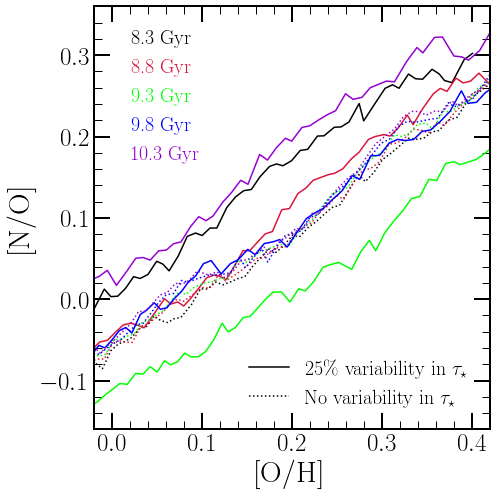

In [55]:
fig = plt.figure(figsize = (7, 7), facecolor = "white") 
ax = fig.add_subplot(111) 
ax.set_xlabel("[O/H]") 
ax.set_ylabel("[N/O]") 
ax.set_xlim([-0.02, 0.42]) 
ax.set_ylim([-0.16, 0.36]) 

legend_kwargs = {
    "loc": plots.mpltoolkit.mpl_loc("lower right"), 
    "ncol": 1, 
    "frameon": False, 
    "fontsize": 20, 
    "bbox_to_anchor": (0.99, 0.01), 
}
line1 = ax.plot([1, 2], [1, 2], c = plots.mpltoolkit.named_colors()["black"], 
    label = r"25\% variability in $\tau_\star$")[0]
line2 = ax.plot([1, 2], [1, 2], c = plots.mpltoolkit.named_colors()["black"], 
    label = r"No variability in $\tau_\star$", linestyle = ':')[0] 
leg = ax.legend(**legend_kwargs) 
ax.add_artist(leg) 
line1.remove() 
line2.remove() 

insideout = vice.output("../outputs/diffusion/insideout") 
modulated = vice.output("../outputs/diffusion/modulated_sfe") 
# times = [6., 6.5, 7., 7.5, 8.] 
# times = [8., 8.5, 9., 9.5, 10.0] 
times = [8.3, 8.8, 9.3, 9.8, 10.3] 
colors = ["black", "crimson", "lime", "blue", "darkviolet"] 
zones = ["zone%d" % (_) for _ in range(20, 155)] 
for i in range(len(times)): 
    diff = [abs(_ - times[i]) for _ in insideout.zones["zone0"].history["time"]] 
    idx = diff.index(min(diff)) 
    kwargs = {"c": plots.mpltoolkit.named_colors()[colors[i]]} 
    xvals = [insideout.zones[zone].history["[o/h]"][idx] for zone in zones] 
    yvals = [insideout.zones[zone].history["[n/o]"][idx] for zone in zones] 
    ax.plot(xvals, yvals, linestyle = ':', **kwargs) 
    kwargs["label"] = "%g Gyr" % (times[i]) 
    xvals = [modulated.zones[zone].history["[o/h]"][idx] for zone in zones] 
    yvals = [modulated.zones[zone].history["[n/o]"][idx] for zone in zones] 
    ax.plot(xvals, yvals, **kwargs) 
legend_kwargs["handlelength"] = 0 
legend_kwargs["loc"] = plots.mpltoolkit.mpl_loc("upper left") 
legend_kwargs["bbox_to_anchor"] = (0.01, 0.99) 
leg = ax.legend(**legend_kwargs) 
for i in range(len(colors)): 
    leg.get_texts()[i].set_color(colors[i]) 
    leg.legendHandles[i].set_visible(False) 

plt.tight_layout() 
plt.savefig("../paper/no_oh_sfevar.pdf") 

/Users/astrobeard/.local/lib/python3.7/site-packages/vice-1.3.0-py3.7-macosx-10.9-x86_64.egg/vice/core/outputs/output.py:131: UserWarning: agb n yield not encoded with output. Assuming the current yield setting, which may not reflect the yield setting at the time the simulation was ran.
  self.__c_version = c_output(name)


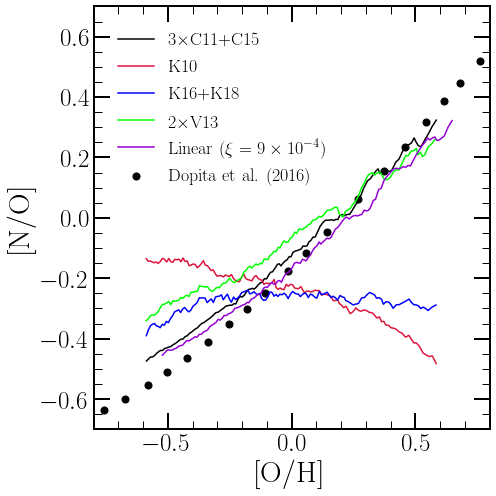

In [2]:
fig = plt.figure(figsize = (7, 7), facecolor = "white") 
ax = fig.add_subplot(111, facecolor = "white") 
ax.set_xlabel("[O/H]") 
ax.set_ylabel("[N/O]") 
ax.set_xlim([-0.8, 0.8]) 
ax.set_ylim([-0.7, 0.7]) 
names = [
    "../outputs/diffusion/insideout", 
    "../outputs/diffusion/insideout_karakas10", 
    "../outputs/diffusion/insideout_karakas16", 
    "../outputs/diffusion/insideout_ventura13", 
    "../outputs/diffusion/insideout_linear2" 
]
# names = [
#     "../outputs/diffusion/insideout", 
#     "../outputs/diffusion/insideout_3xcristallo", 
#     "../outputs/diffusion/insideout_2xcristallo" 
# ]
outputs = [vice.output(_) for _ in names] 
# colors = ["black", "crimson", "darkviolet", "blue", "lime"] 
colors = ["black", "crimson", "blue", "lime", "darkviolet"] 
# colors = ["black", "red", "blue"] 
zones = ["zone%d" % (_) for _ in range(20, 151)] 
# labels = [
#     r"3$\times$Cristallo et al. (2011)", 
#     "Karakas (2010)", 
#     "Karakas \& Lugaro (2016)", 
#     r"2$\times$Ventura et al. (2013)", 
#     r"Linear ($\xi = 9\times10^{-4}$)" 
# ]
labels = [
    r"3$\times$C11+C15", 
    "K10", 
    "K16+K18", 
    r"2$\times$V13", 
    r"Linear ($\xi = 9\times10^{-4}$)" 
]
# labels = [
#     r"4$\times$Cristallo et al. (2011, 2015)", 
#     r"3$\times$Cristallo et al. (2011, 2015)", 
#     r"2$\times$Cristallo et al. (2011, 2015)" 
# ]
for i in range(len(outputs)): 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "label": labels[i] 
    } 
    xvals = [outputs[i].zones[_].history["[o/h]"][-1] for _ in zones] 
    yvals = [outputs[i].zones[_].history["[n/o]"][-1] for _ in zones] 
    ax.plot(xvals, yvals, **kwargs) 
dopita2016 = src.data.read("dopita2016") 
kwargs = {
    "c": plots.mpltoolkit.named_colors()["black"], 
    "marker": plots.mpltoolkit.markers()["circle"], 
    "label": "Dopita et al. (2016)", 
    "s": 50 
} 
ax.scatter(dopita2016["[o/h]"], dopita2016["[n/o]"], **kwargs) 
kwargs = {
    "loc": plots.mpltoolkit.mpl_loc("upper left"), 
    "ncol": 1, 
    "frameon": False, 
    "fontsize": 18, 
    "bbox_to_anchor": (0.02, 0.98), 
#     "handlelength": 0 
}
leg = ax.legend(**kwargs) 
# for i in range(len(colors)): 
#     leg.get_texts()[i].set_color(colors[i]) 
#     leg.legendHandles[i].set_visible(False) 
plt.tight_layout() 
plt.savefig("../paper/no_oh_predictions.pdf") 

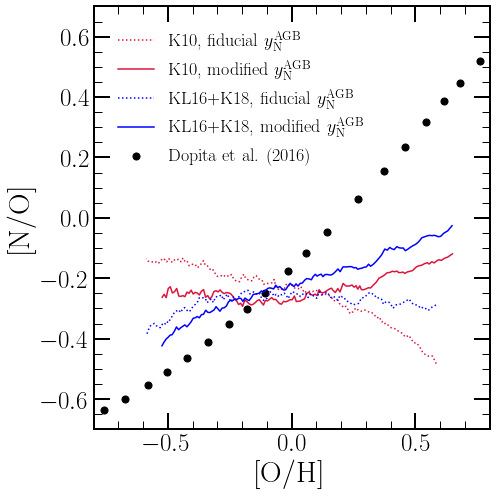

In [29]:
fig = plt.figure(figsize = (7, 7), facecolor = "white") 
ax = fig.add_subplot(111, facecolor = "white") 
ax.set_xlabel("[O/H]") 
ax.set_ylabel("[N/O]") 
ax.set_xlim([-0.8, 0.8]) 
ax.set_ylim([-0.7, 0.7]) 
names = [
    "../outputs/diffusion/insideout_karakas10", 
    "../outputs/diffusion/insideout_karakas10_linearcc", 
    "../outputs/diffusion/insideout_karakas16", 
    "../outputs/diffusion/insideout_karakas16_brokencc" 
]
outputs = [vice.output(_) for _ in names] 
colors = ["crimson", "crimson", "blue", "blue"] 
linestyles = [':', '-', ':', '-'] 
zones = ["zone%d" % (_) for _ in range(20, 151)] 
labels = [
    r"K10, fiducial $y_\text{N}^\text{AGB}$", 
    r"K10, modified $y_\text{N}^\text{AGB}$", 
    r"KL16+K18, fiducial $y_\text{N}^\text{AGB}$", 
    r"KL16+K18, modified $y_\text{N}^\text{AGB}$" 
]
for i in range(len(outputs)): 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "label": labels[i], 
        "linestyle": linestyles[i] 
    } 
    xvals = [outputs[i].zones[_].history["[o/h]"][-1] for _ in zones] 
    yvals = [outputs[i].zones[_].history["[n/o]"][-1] for _ in zones] 
    ax.plot(xvals, yvals, **kwargs) 
dopita2016 = src.data.read("dopita2016") 
kwargs = {
    "c": plots.mpltoolkit.named_colors()["black"], 
    "marker": plots.mpltoolkit.markers()["circle"], 
    "label": "Dopita et al. (2016)", 
    "s": 50 
} 
ax.scatter(dopita2016["[o/h]"], dopita2016["[n/o]"], **kwargs) 
kwargs = {
    "loc": plots.mpltoolkit.mpl_loc("upper left"), 
    "ncol": 1, 
    "frameon": False, 
    "fontsize": 18, 
    "bbox_to_anchor": (0.02, 0.98), 
}
leg = ax.legend(**kwargs) 
# for i in range(len(colors)): 
#     leg.get_texts()[i].set_color(colors[i]) 
#     leg.legendHandles[i].set_visible(False) 
plt.tight_layout() 
plt.savefig("../paper/no_oh_predictions_karakas.pdf") 

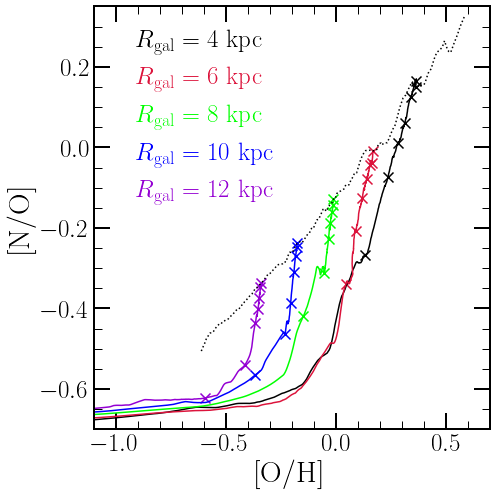

In [4]:
fig = plt.figure(figsize = (7, 7), facecolor = "white") 
ax = fig.add_subplot(111) 
ax.set_xlabel("[O/H]") 
ax.set_ylabel("[N/O]") 
ax.set_xlim([-1.1, 0.7]) 
ax.set_ylim([-0.7, 0.35]) 
zones = ["zone40", "zone60", "zone80", "zone100", "zone120"] 
labels = [] 
for i in [4, 6, 8, 10, 12]: 
    labels.append(r"$R_\text{gal}$ = %d kpc" % (i)) 
colors = ["black", "crimson", "lime", "blue", "darkviolet"] 
times = [2, 4, 6, 8, 10, 12, 13.195] 

out = vice.output("../outputs/diffusion/insideout") 

for i in range(len(zones)): 
    xvals = out.zones[zones[i]].history["[o/h]"] 
    yvals = out.zones[zones[i]].history["[n/o]"] 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "label": labels[i] 
    } 
    ax.plot(xvals, yvals, **kwargs) 
    for j in range(len(times)): 
        idx = out.zones["zone0"].history["time"].index(times[j]) 
        oh = out.zones[zones[i]].history["[o/h]"][idx] 
        no = out.zones[zones[i]].history["[n/o]"][idx] 
        ax.scatter(oh, no, marker = plots.mpltoolkit.markers()["x"], 
            color = plots.mpltoolkit.named_colors()[colors[i]], s = 100) 

leg = ax.legend(loc = plots.mpltoolkit.mpl_loc("upper left"), ncol = 1, 
    frameon = False, handlelength = 0) 
for i in range(len(zones)): 
    leg.get_texts()[i].set_color(colors[i]) 
    leg.legendHandles[i].set_visible(False) 
    
zones = ["zone%d" % (_) for _ in range(20, 154)] 
xvals = [out.zones[zone].history["[o/h]"][-1] for zone in zones] 
yvals = [out.zones[zone].history["[n/o]"][-1] for zone in zones] 
ax.plot(xvals, yvals, c = plots.mpltoolkit.named_colors()["black"], linestyle = ':') 

plt.tight_layout() 
plt.savefig("../paper/no_oh_superposition.pdf") 

ValueError: 13.2 is not in list

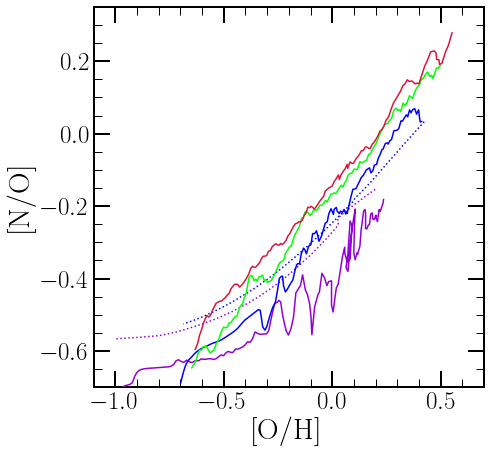

In [7]:
fig = plt.figure(figsize = (7, 7), facecolor = "white") 
ax = fig.add_subplot(111, facecolor = "white") 
ax.set_xlabel("[O/H]") 
ax.set_ylabel("[N/O]") 
ax.set_xlim([-1.1, 0.7]) 
ax.set_ylim([-0.7, 0.35])
times = [2, 5, 8, 11, 13.2] 
colors = ["darkviolet", "blue", "lime", "crimson", "black"] 
# linestyles = ['-.', ':', '-', '--', '-'] 
diffusion = vice.output("../outputs/diffusion/insideout") 
postprocess = vice.output("../outputs/post-process/insideout_3xcristallo") 
zones = ["zone%d" % (_) for _ in range(20, 155)] 
for i in range(len(times)): 
    idx = postprocess.zones["zone0"].history["time"].index(times[i]) 
    oh = [postprocess.zones[zone].history["[o/h]"][idx] for zone in zones] 
    no = [postprocess.zones[zone].history["[n/o]"][idx] for zone in zones] 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]] 
    } 
    if i < 2: ax.plot(oh, no, linestyle = ':', zorder = 5, **kwargs) 
    idx = diffusion.zones["zone0"].history["time"].index(times[i]) 
    oh = [diffusion.zones[zone].history["[o/h]"][idx] for zone in zones] 
    no = [diffusion.zones[zone].history["[n/o]"][idx] for zone in zones] 
#     kwargs = {
#         "c": plots.mpltoolkit.named_colors()[colors[i]], 
#         "linestyle": linestyles[i], 
#         "label": "T = %g Gyr" % (times[i]) 
#     } 
    kwargs["label"] = "T = %g Gyr" % (times[i]) 
    ax.plot(oh, no, zorder = 10, **kwargs) 
kwargs = {
    "loc": plots.mpltoolkit.mpl_loc("upper left"), 
    "ncol": 1, 
    "frameon": False, 
    "bbox_to_anchor": (0.02, 0.98), 
    "fontsize": 22, 
    "handlelength": 0 
} 
leg = ax.legend(**kwargs) 
for i in range(len(times)): 
    leg.get_texts()[i].set_color(colors[i]) 
    leg.legendHandles[i].set_visible(False) 
plt.tight_layout() 
plt.savefig("../paper/no_oh_timeevol.pdf") 

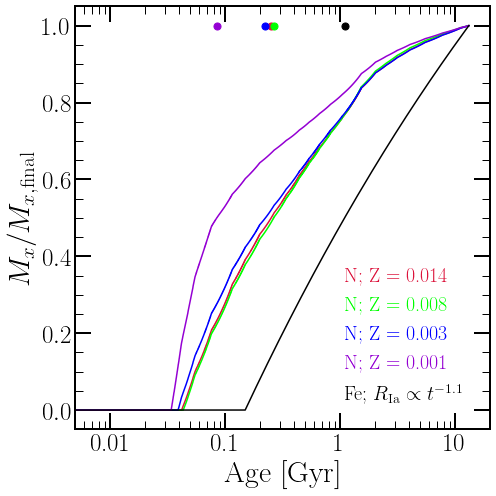

In [9]:
vice.mlr.setting = "ka1997" # mass-lifetime relation 
total_time = 13.2 # Gyr, total time to run SSP calculation for
fig = plt.figure(figsize = (7, 7), facecolor = "white") 
ax = fig.add_subplot(111) 
ax.set_xscale("log") 
ax.set_xlabel("Age [Gyr]") 
ax.set_ylabel(r"$M_x/M_{x,\text{final}}$") 
plots.mpltoolkit.xticklabel_formatter(ax) 
ax.set_xlim([0.005, 20]) 
ax.set_ylim([-0.05, 1.05]) 
vice.yields.ccsne.settings['fe'] = 0.0 
vice.yields.sneia.settings['fe'] = 0.0017 
vice.yields.ccsne.settings['n'] = 0 
vice.yields.agb.settings['n'] = "cristallo11"
metallicities = [0.014, 0.008, 0.003, 0.001] 
colors = ["crimson", "lime", "blue", "darkviolet"] 
for i in range(len(metallicities)): 
    mass, time = vice.single_stellar_population('n', Z = metallicities[i], 
        time = total_time, dt = 1.e-4) 
    mass = [_ / mass[-1] for _ in mass] 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "label": "N; Z = %g" % (metallicities[i]) 
    } 
    ax.plot(time, mass, **kwargs) 
    diff = [abs(_ - 0.5) for _ in mass] 
    idx = diff.index(min(diff)) 
    ax.scatter(time[idx], 1.0, c = plots.mpltoolkit.named_colors()[colors[i]], 
        marker = plots.mpltoolkit.markers()["circle"], s = 50) 
#     ax.plot(2 * [time[idx]], ax.get_ylim(), c = plots.mpltoolkit.named_colors()[colors[i]], 
#         linestyle = ':') 
mass, time = vice.single_stellar_population('fe', time = total_time, dt = 1.e-4) 
mass = [_ / mass[-1] for _ in mass] 
kwargs = {
    "c": plots.mpltoolkit.named_colors()["black"], 
    "label": r"Fe; $R_\text{Ia} \propto t^{-1.1}$" 
} 
ax.plot(time, mass, **kwargs) 
diff = [abs(_ - 0.5) for _ in mass] 
idx = diff.index(min(diff)) 
ax.scatter([time[idx]], 1.0, c = plots.mpltoolkit.named_colors()["black"], 
    marker = plots.mpltoolkit.markers()["circle"], s = 50)
# ax.plot(2 * [time[idx]], ax.get_ylim(), c = plots.mpltoolkit.named_colors()["black"], 
#     linestyle = ':') 
leg = ax.legend(loc = plots.mpltoolkit.mpl_loc("lower right"), ncol = 1, frameon = False, 
    fontsize = 20, handlelength = 0, bbox_to_anchor = (0.98, 0.02)) 
for i in range(len(metallicities)): 
    leg.get_texts()[i].set_color(colors[i]) 
    leg.legendHandles[i].set_visible(False) 
leg.legendHandles[i + 1].set_visible(False) 

plt.tight_layout() 
plt.savefig("../paper/ssp_production.pdf") 

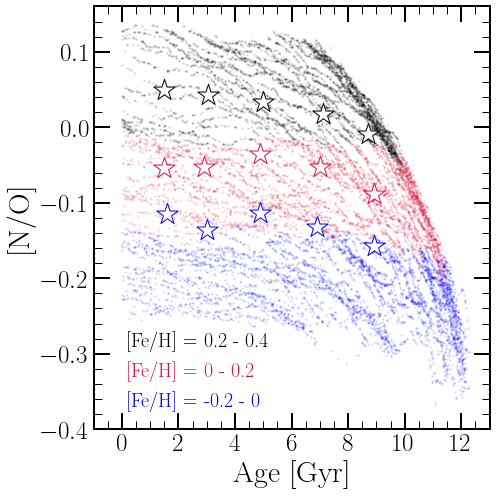

In [63]:
fig = plt.figure(figsize = (7, 7), facecolor = "white") 
ax = fig.add_subplot(111) 
ax.set_xlim([-1, 13]) 
ax.set_xticks(range(0, 14, 2)) 
ax.set_xlabel("Age [Gyr]") 
ax.set_ylabel("[N/O]") 
ax.set_ylim([-0.4, 0.16]) 


out = vice.output("../outputs/diffusion/insideout_3xcristallo") 
feh_bins = [[0.2, 0.4], [0.0, 0.2], [-0.2, 0.0]] 
age_bins = [[0, 2], [2, 4], [4, 6], [6, 8], [8, 10]] 
colors = ["black", "crimson", "blue"] 
stars = out.stars.filter(
    "zone_final", ">=", 20).filter(
    "zone_final", "<=", 154) 


for i in range(len(feh_bins)): 
    sub = stars.filter("[fe/h]", ">=", feh_bins[i][0]).filter("[fe/h]", "<=", feh_bins[i][1]) 
    norm = sum(sub["mass"]) 
    mass_fracs = [_ / norm for _ in sub["mass"]] 
    indeces = np.random.choice(len(mass_fracs), size = 5000, p = mass_fracs) 
    ages = [sub["age"][index] for index in indeces] 
    no = [sub["[n/o]"][index] for index in indeces] 
    feh = [sub["[fe/h]"][index] for index in indeces] 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "s": 2, 
        "label": "[Fe/H] = %g - %g" % (feh_bins[i][0], feh_bins[i][1]), 
        "alpha": 0.1 
    } 
    ax.scatter(ages, no, **kwargs) 
leg = ax.legend(loc = plots.mpltoolkit.mpl_loc("lower left"), ncol = 1, frameon = False, 
    handlelength = 0, fontsize = 20) 
for i in range(len(feh_bins)): 
    leg.get_texts()[i].set_color(colors[i]) 
    leg.legendHandles[i].set_visible(False) 
    

v21 = src.data.read("vincenzo2021") 
for i in range(len(feh_bins)): 
    sub_ = v21.filter("[fe/h]", ">=", feh_bins[i][0]).filter("[fe/h]", "<=", feh_bins[i][1]) 
    for j in range(len(age_bins)): 
        sub = sub_.filter("age", ">=", age_bins[j][0]).filter("age", "<=", age_bins[j][1]) 
        age = np.median(sub["age"]) 
        no = np.median(sub["[n/o]"])
#         age_errbar = [[age - age_bins[j][0]], [age_bins[j][1] - age]] 
#         no_errbar = np.std(sub["[n/o]"]) 
#         kwargs = {
#             "color": plots.mpltoolkit.named_colors()[colors[i]], 
#             "marker": plots.mpltoolkit.markers()["star"], 
#             "markerfacecolor": plots.mpltoolkit.named_colors()["white"], 
#             "markeredgecolor": plots.mpltoolkit.named_colors()[colors[i]], 
#             "markersize": 20 
#         }
#         ax1.errorbar(age, no, xerr = age_errbar, yerr = no_errbar, **kwargs)
        kwargs = {
            "marker": plots.mpltoolkit.markers()["star"], 
            "facecolor": plots.mpltoolkit.named_colors()["white"], 
            "edgecolor": plots.mpltoolkit.named_colors()[colors[i]], 
            "s": 500
        } 
        ax.scatter(age, no, **kwargs) 

plt.tight_layout() 
plt.subplots_adjust(wspace = 0) 
plt.savefig("../paper/no_vs_age.pdf") 

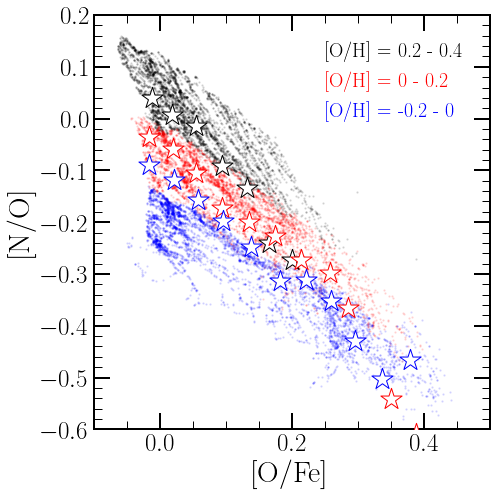

In [61]:
fig = plt.figure(figsize = (7, 7), facecolor = "white") 
ax = fig.add_subplot(111) 
ax.set_xlabel("[O/Fe]") 
ax.set_ylabel("[N/O]") 
ax.set_xlim([-0.1, 0.5]) 
ax.set_ylim([-0.6, 0.2]) 
oh_bins = [[0.2, 0.4], [0.0, 0.2], [-0.2, 0.0]] 
ofe_bins = [[0.04 * (i - 1), 0.04 * i] for i in range(11)] 
colors = ["black", "red", "blue"] 
out = vice.output("../outputs/diffusion/insideout_3xcristallo") 
stars = out.stars.filter(
    "zone_final", ">=", 20).filter(
    "zone_final", "<=", 154) 

v21 = src.data.read("vincenzo2021") 
v21["[o/fe]"] = [a - b for a, b in zip(v21["[o/h]"], v21["[fe/h]"])] 

for i in range(len(oh_bins)): 
    sub = stars.filter("[o/h]", ">=", oh_bins[i][0]).filter("[o/h]", "<=", oh_bins[i][1]) 
    norm = sum(sub["mass"]) 
    mass_fracs = [_ / norm for _ in sub["mass"]] 
    indeces = np.random.choice(len(mass_fracs), size = 5000, p = mass_fracs) 
    ages = [sub["age"][index] for index in indeces] 
    no = [sub["[n/o]"][index] for index in indeces] 
    ofe = [sub["[o/fe]"][index] for index in indeces] 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "s": 2, 
        "label": "[O/H] = %g - %g" % (oh_bins[i][0], oh_bins[i][1]), 
        "alpha": 0.1 
    } 
    ax.scatter(ofe, no, **kwargs) 
    sub_ = v21.filter("[o/h]", ">=", oh_bins[i][0]).filter("[o/h]", "<=", oh_bins[i][1]) 
    for j in range(len(ofe_bins)): 
        sub = sub_.filter("[o/fe]", ">=", ofe_bins[j][0]).filter("[o/fe]", "<=", ofe_bins[j][1]) 
        ofe = np.median(sub["[o/fe]"]) 
        no = np.median(sub["[n/o]"]) 
        kwargs = {
            "marker": plots.mpltoolkit.markers()["star"], 
            "facecolor": plots.mpltoolkit.named_colors()["white"], 
            "edgecolor": plots.mpltoolkit.named_colors()[colors[i]], 
            "s": 500, 
            "zorder": 100 
        } 
        ax.scatter(ofe, no, **kwargs) 
    
leg = ax.legend(loc = plots.mpltoolkit.mpl_loc("upper right"), ncol = 1, frameon = False, 
    handlelength = 0, fontsize = 20, bbox_to_anchor = (0.98, 0.98)) 
for i in range(len(oh_bins)): 
    leg.get_texts()[i].set_color(colors[i]) 
    leg.legendHandles[i].set_visible(False) 
plt.tight_layout() 
plt.savefig("../paper/no_vs_ofe.pdf") 

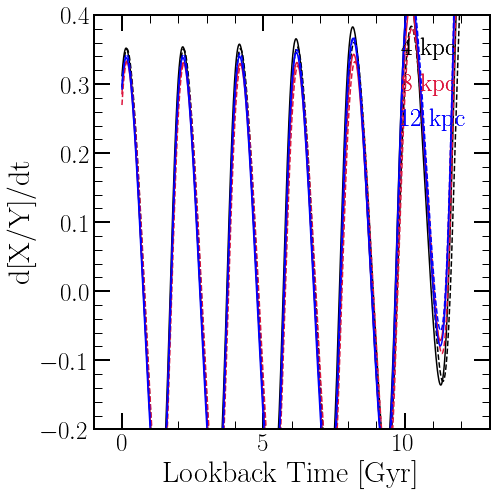

In [20]:
fig = plt.figure(figsize = (7, 7), facecolor = "white") 
ax = fig.add_subplot(111, facecolor = "white") 
ax.set_xlabel("Lookback Time [Gyr]") 
# ax.set_ylabel("[X/Y]") 
ax.set_ylabel("d[X/Y]/dt") 
ax.set_xlim([-1, 13]) 
# ax.set_ylim([-1.3, 0.7]) 
ax.set_ylim([-0.2, 0.4]) 

out = vice.output("../outputs/post-process/insideout_3xcristallo") 

kwargs = {
    "c": plots.mpltoolkit.named_colors()["black"] 
}
# line1 = ax.plot([0, 1], [0, 1], linestyle = '-', label = "[N/H]", **kwargs)[0] 
# line2 = ax.plot([0, 1], [0, 1], linestyle = '--', label = "[Fe/H]", **kwargs)[0] 
# leg = ax.legend(loc = plots.mpltoolkit.mpl_loc("lower left"), ncol = 1, frameon = False) 
# ax.add_artist(leg) 
# line1.remove() 
# line2.remove() 

# zones = ["zone40", "zone60", "zone80", "zone100", "zone120"] 
# labels = ["4 kpc", "6 kpc", "8 kpc", "10 kpc", "12 kpc"] 
# colors = ["black", "crimson", "lime", "blue", "darkviolet"] 
zones = ["zone40", "zone80", "zone120"] 
labels = ["4 kpc", "8 kpc", "12 kpc"] 
colors = ["black", "crimson", "blue"] 
for i in range(len(zones)): 
#     xvals = out.zones[zones[i]].history["lookback"] 
    xvals = [(a + b) / 2 for a, b in zip(out.zones[zones[i]].history["lookback"][1:], 
        out.zones[zones[i]].history["lookback"][:-1])] 
#     yvals = out.zones[zones[i]].history["[fe/h]"] 
    yvals = len(xvals) * [0.] 
    for j in range(len(yvals)): 
        yvals[j] = out.zones[zones[i]].history["[fe/h]"][j + 1] - out.zones[zones[i]].history["[fe/h]"][j] 
        yvals[j] /= out.zones[zones[i]].history["time"][j + 1] - out.zones[zones[i]].history["time"][j] 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "linestyle": '--' 
    } 
    ax.plot(xvals, yvals, **kwargs) 
    for j in range(len(yvals)): 
        yvals[j] = out.zones[zones[i]].history["[n/h]"][j + 1] - out.zones[zones[i]].history["[n/h]"][j] 
        yvals[j] /= out.zones[zones[i]].history["time"][j + 1] - out.zones[zones[i]].history["time"][j] 
#     yvals = out.zones[zones[i]].history["[n/h]"] 
    kwargs["linestyle"] = '-' 
    kwargs["label"] = labels[i] 
    ax.plot(xvals, yvals, **kwargs) 
leg = ax.legend(loc = plots.mpltoolkit.mpl_loc("upper right"), ncol = 1, frameon = False, 
    handlelength = 0) 
for i in range(len(zones)): 
    leg.get_texts()[i].set_color(colors[i]) 
    leg.legendHandles[i].set_visible(False) 
ax.add_artist(leg) 
plt.tight_layout() 
plt.savefig("../paper/no_feh_vs_lookback.pdf") 